# Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sddata = np.load("RaspberryPi/SalvagedDiodes.npz", allow_pickle=True)["data"][()]

# Parts

Overview of the diodes gotten from the failed power supply:

| Part | Description |
|:-|:-|
| R0156G6 | ? |
| [1N5406](https://datasheet.octopart.com/1N5406-E3-54-Vishay-datasheet-5389941.pdf) | 600V, 3A General Purpose Plastic Rectifier |
| [SR504](https://datasheet.octopart.com/SR504-TP-Micro-Commercial-datasheet-133522038.pdf)¹ | 40V, 5A Schottky Barrier Rectifier |
| [SBR30A40CT](https://www.diodes.com/part/view/SBR30A40CT) | 40V, 30A SBR® Super Barrier Rectifier |
| [STPS20H100CT](https://www.st.com/en/diodes-and-rectifiers/stps20h100c.html) | 100V, 20A Power Schottky Rectifier |
| [STTH8S06](https://www.st.com/en/diodes-and-rectifiers/stth8s06.html) | 600V, 8A Ultrafast Boost Diode |
| T2D70 | ? |
| [US8KB80R](https://www.mouser.be/datasheet/2/366/US8KB80R-1203187.pdf) | 800V, 8A, Silicon Bridge Diodes |

¹ More than one manufacturer makes part with number SR504


# Results

## All diodes

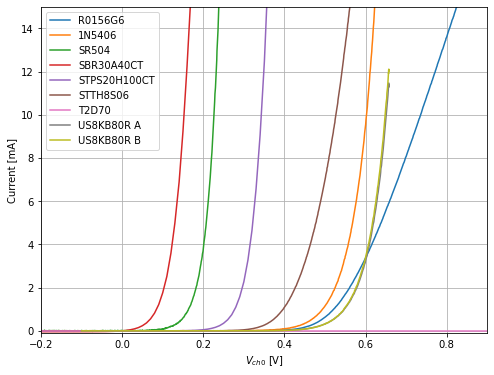

In [3]:
def _block():
    names = tuple(filter(lambda k: k != "US8KB80R", sddata.keys()))

    plt.figure(figsize=[8,6])
    for name in names:
        data = sddata[name]
        plt.plot(data[:,0], 1e3*data[:, 1])
    bridgedata = sddata["US8KB80R"]["meas1"]
    plt.plot(bridgedata[:,0], -1e3*bridgedata[:, 2])
    plt.plot(bridgedata[:,0], -1e3*bridgedata[:, 3])
    plt.xlabel("$V_{ch0}$ [V]")
    plt.ylabel("Current [mA]")
    plt.axis([-0.2, 0.9, -0.1, 15])
    plt.legend(names + ("US8KB80R A", "US8KB80R B"))
    plt.grid("on")
    plt.show()
_block()

A diode is a device that is conducting when a positive voltage is applied and only leakage current is flowing with a negative bias. A diode curve was measured on all the devices except for the T2D70A where not current was seen over the full range up to over 12V. This may be a reason why the power supply had failed.  
For the rest, a variety is seen between the parts with different threshold voltages and on resistance. SBR30A40CT has the lowest threshold voltage and R0156G6 the highest on resistance.

## US8KB80R Bridge Rectifier

![](BridgeRectifier.png)

The US8KB80R is a full bridge rectifier, meaning it has 4 diodes. It has the main AC as input (2 & 3) and has a rectified voltage at the output (1: -, 4: +).

### Sweep node 1, other nodes @ 0V

The first measurement on the device was done by sweeping the voltage on node 1 and keeping nodes 2-4 at 0V. The current in all the nodes was measured.


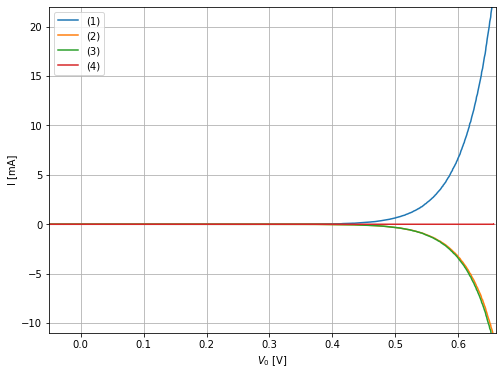

In [4]:
def _block():
    meas1 = sddata["US8KB80R"]["meas1"]
    plt.figure(figsize=(8,6))
    for i in range(1, 5):
        plt.plot(meas1[:,0], 1e3*meas1[:, i], label=f"({i})")
    plt.xlabel("$V_0$ [V]")
    plt.ylabel("I [mA]")
    plt.axis([-0.05, 0.66, -11, 22])
    plt.legend()
    plt.grid("on")
    plt.show()
_block()

One can see that current is flowing from around 0.5V; half the current goes from node 1 to node 2 and half from node 1 to node 3; no current is flowing to node 4.

### Node 1 sweep, node 4 0V, node 2&3 floating

For this measurement again node 1 was swept but now only node 4 was kept at 0V and node 2 and node 3 were floating. The current flowing in node 1 and node 4, and the voltage in node 2 and 3 was measured.

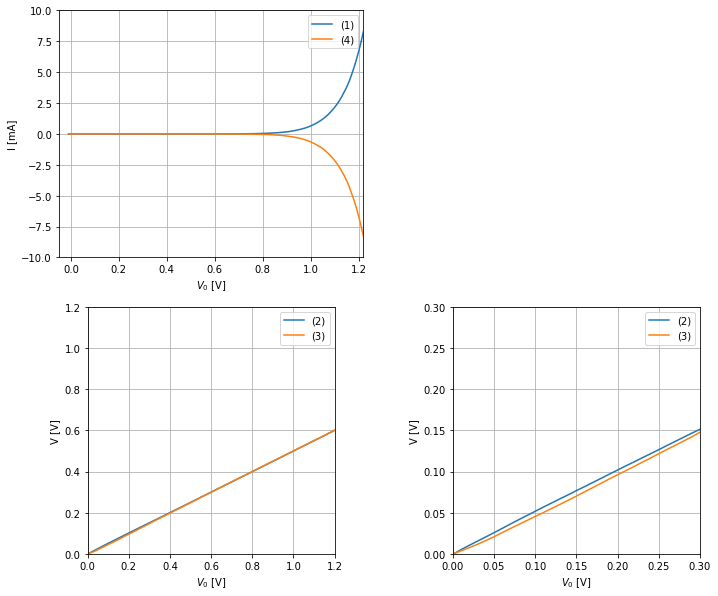

In [5]:
def _block():
    meas2 = sddata["US8KB80R"]["meas2"]

    plt.figure(figsize=(12,10))

    plt.subplot(2, 2, 1)
    for i in (1, 4):
        plt.plot(meas2[:, 0], 1e3*meas2[:, i], label=f"({i})")
    plt.xlabel("$V_0$ [V]")
    plt.ylabel("I [mA]")
    plt.legend()
    plt.axis([-0.05, 1.22, -10, 10])
    plt.grid("on")

    plt.subplot(2,2,3)
    for i in (2, 3):
        plt.plot(meas2[:, 0], meas2[:, i], label=f"({i})")
    plt.xlabel("$V_0$ [V]")
    plt.ylabel("V [V]")
    plt.legend()
    plt.axis("square")
    plt.axis([0, 1.2, 0, 1.2])
    plt.grid("on")

    plt.subplot(2,2,4)
    for i in (2, 3):
        plt.plot(meas2[:, 0], meas2[:, i], label=f"({i})")
    plt.xlabel("$V_0$ [V]")
    plt.ylabel("V [V]")
    plt.legend()
    plt.axis("square")
    plt.axis([0, 0.3, 0, 0.3])
    plt.grid("on")

    plt.show()
_block()

In this configuration the current flows from node 1 to node 4 and nodes 2 and 3 are at half the voltage of node 1. A zoom on the node 2 and 3 voltage in sub-threshold regime is given in the lower right figure. One can see that in this case the voltage on node 3 is slightly lower than on node 2. This is caused by different leakage currents of the 4 diodes in the bridge.

### Opposite force on node 2&3, floating node 1&4

In the last measurement we now sweep voltage on node 2&3 in opposite direction so that the voltage on node 3 is always the opposite value of the one on node 2.

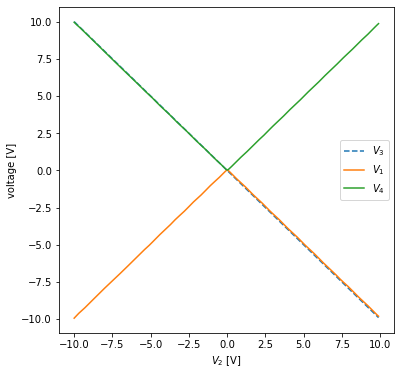

In [6]:
def _block():
    meas3 = sddata["US8KB80R"]["meas3"]

    plt.figure(figsize=(6,6))

    plt.plot(meas3[:,1], meas3[:,2], '--', label="$V_3$")
    plt.plot(meas3[:,1], meas3[:,0], label="$V_1$")
    plt.plot(meas3[:,1], meas3[:,3], label="$V_4$")
    plt.xlabel("$V_2$ [V]")
    plt.ylabel("voltage [V]")
    plt.legend()

    plt.show()
_block()

Here we verfied the functionality of the full diode bridge rectifier: The voltage on node 1 follows the lowest voltage on node 2&3 and the voltage on node 4 the highest one.